In [1]:
import sys
import os

In [2]:
!pip install pyFFTW

     ---------------------------------------- 2.6/2.6 MB 12.7 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.26.4 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.0.1 which is incompatible.
scipy 1.7.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install netCDF4


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


MAIN EXECUTION

In [23]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers

In [37]:
!python main.py

Starting integration on field.

c:\Users\Mrigank Dhingra\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"




Iteration 	 100, time 	 0.001394, time remaining 	 0.998606. TKE: 0.436377, ENS: 18916535.622823
Iteration 	 200, time 	 0.002702, time remaining 	 0.997298. TKE: 0.436283, ENS: 18911431.391273
Iteration 	 300, time 	 0.004010, time remaining 	 0.995990. TKE: 0.436189, ENS: 18906328.717733
Iteration 	 400, time 	 0.005317, time remaining 	 0.994683. TKE: 0.436095, ENS: 18901227.433476
Iteration 	 500, time 	 0.006625, time remaining 	 0.993375. TKE: 0.436000, ENS: 18896127.370191
Iteration 	 600, time 	 0.007932, time remaining 	 0.992068. TKE: 0.435906, ENS: 18891028.359949
Iteration 	 700, time 	 0.009240, time remaining 	 0.990760. TKE: 0.435812, ENS: 18885930.235629
Iteration 	 800, time 	 0.010547, time remaining 	 0.989453. TKE: 0.435718, ENS: 18880832.838520
Iteration 	 900, time 	 0.011855, time remaining 	 0.988145. TKE: 0.435623, ENS: 18875736.004683
Iteration 	 1000, time 	 0.013163, time remaining 	 0.986837. TKE: 0.435529, ENS: 18870639.567193
Iteration 	 1100, time 	 0.


Iteration 	 70300, time 	 0.918528, time remaining 	 0.081472. TKE: 0.380375, ENS: 12303962.499550
Iteration 	 70400, time 	 0.919835, time remaining 	 0.080165. TKE: 0.380314, ENS: 12293669.570662
Iteration 	 70500, time 	 0.921142, time remaining 	 0.078858. TKE: 0.380252, ENS: 12283384.716031
Iteration 	 70600, time 	 0.922448, time remaining 	 0.077552. TKE: 0.380191, ENS: 12273107.984175
Iteration 	 70700, time 	 0.923755, time remaining 	 0.076245. TKE: 0.380130, ENS: 12262839.411711
Iteration 	 70800, time 	 0.925062, time remaining 	 0.074938. TKE: 0.380069, ENS: 12252579.020590
Iteration 	 70900, time 	 0.926369, time remaining 	 0.073631. TKE: 0.380008, ENS: 12242326.815493
Iteration 	 71000, time 	 0.927676, time remaining 	 0.072324. TKE: 0.379947, ENS: 12232082.782183
Iteration 	 71100, time 	 0.928984, time remaining 	 0.071016. TKE: 0.379886, ENS: 12221846.887423
Iteration 	 71200, time 	 0.930291, time remaining 	 0.069709. TKE: 0.379825, ENS: 12211619.080668
Iteration

Time taken

A(1) = Execution time for 76518 iterations is 5173.284052 seconds.
A(0.1) = Execution time for 76162 iterations is 5339.398544 seconds.
A(0.3) = Execution time for 76265 iterations is 4769.071289 seconds.
A(0.7) = Execution time for 76495 iterations is 4953.125621 seconds.

In [2]:
ds = xr.open_dataset('/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_1.nc')

w = ds['w']
tke = ds['tke']
E = ds['E']

In [3]:
w

<xarray.DataArray 'w' (t: 762, y: 512, x: 512)> Size: 799MB
[199753728 values with dtype=float32]
Coordinates:
  * x        (x) float32 2kB 0.0 0.01227 0.02454 0.03682 ... 6.246 6.259 6.271
  * y        (y) float32 2kB 0.0 0.01227 0.02454 0.03682 ... 6.246 6.259 6.271
  * t        (t) float32 3kB 0.0014 0.0014 0.002712 ... 0.9966 0.9979 0.9992
Attributes:
    units:    1/s

In [24]:

def plot_timestep_spectrum(ds, timestep_index):
    """
    Plots the energy spectrum for a specified timestep.

    Parameters:
    ds (xarray.Dataset): The dataset containing the energy spectrum.
    timestep_index (int): The index of the timestep to plot.
    """
    selected_timestep_E = ds['E'].isel(t=timestep_index)
    k = ds['k'].values

    plt.figure(figsize=(6,6))
    plt.loglog(k, selected_timestep_E, '-k', label=f"E(k) at timestep {timestep_index}")
    plt.xlabel("Wavenumber, k")
    plt.ylabel("Energy Spectrum, E(k)")
    plt.title(f"Energy Spectrum at Timestep {timestep_index}")
    plt.legend()
    plt.show()

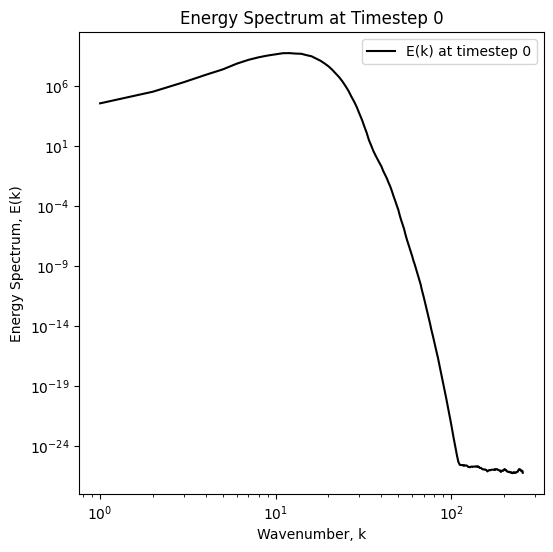

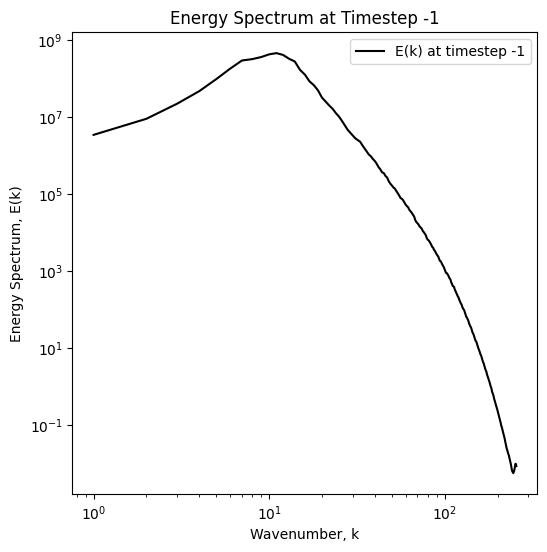

In [5]:
plot_timestep_spectrum(ds, 0)
plot_timestep_spectrum(ds, -1)

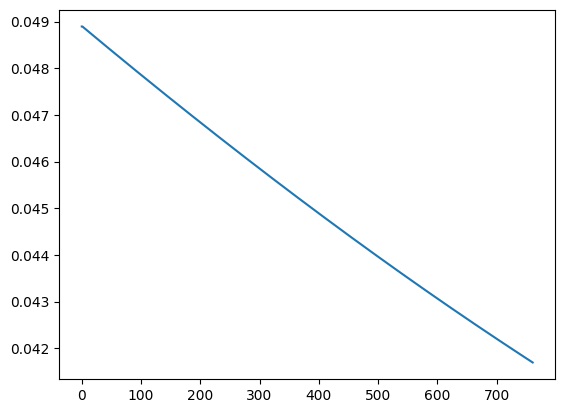

In [6]:
plt.plot(tke)

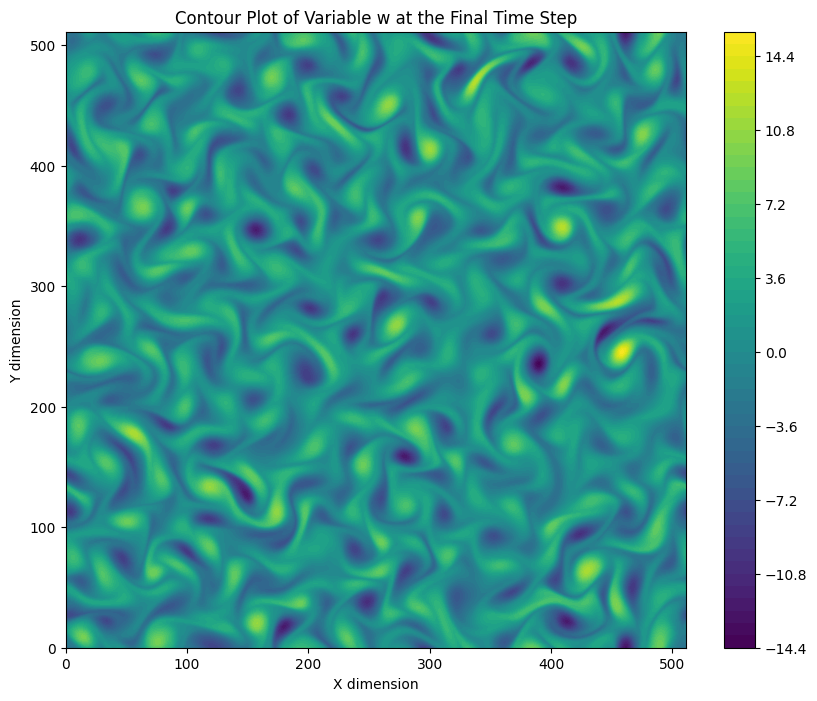

In [7]:
final_slice = w[-1, :, :]

plt.figure(figsize=(10, 8))
plt.contourf(final_slice, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Contour Plot of Variable w at the Final Time Step')
plt.xlabel('X dimension')
plt.ylabel('Y dimension')
plt.show()

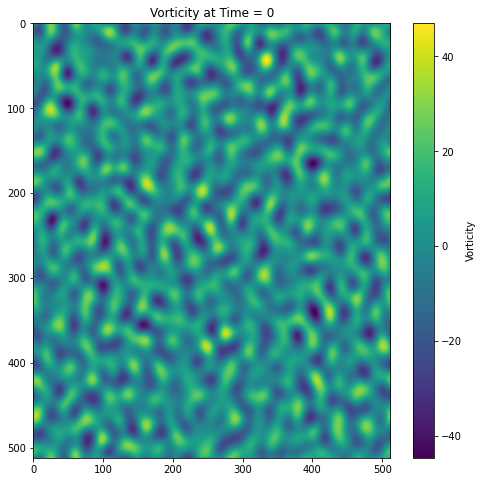

In [11]:
from matplotlib.animation import FFMpegWriter

writer = FFMpegWriter(fps=20, codec='libx264', extra_args=['-pix_fmt', 'yuv420p'])

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(w.isel(t=0), cmap='viridis', aspect='auto')  # Initial frame
ax.set_title('Vorticity at Time = 0')
fig.colorbar(cax, ax=ax, orientation='vertical', label='Vorticity')

def update(frame):
    """Update function for animation."""
    cax.set_data(w.isel(t=frame))
    ax.set_title(f'Vorticity at Time = {frame}')
    return cax,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(w['t']), interval=50, blit=True)

# To save the animation
# ani.save('vorticity_animation.mp4', writer=writer, dpi=150)

In [35]:
!python post/post.py

Using default ploting scheme...
Cleaning workspace..
Done.
Generating .png files and assembling movie...
Done.
Exiting.


'rm' is not recognized as an internal or external command,
operable program or batch file.
'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


training_amplitudes = [0.1, 0.3, 0.5, 0.7, 1]

holdout_amplitude = 0.9

In [25]:
import xarray as xr
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [26]:
def load_and_standardize_data(filepath):
    """
    Load and standardize data from a NetCDF file.
    
    Parameters:
    - filepath: str, the path to the .nc file.
    
    Returns:
    - E_standardized: numpy.ndarray, standardized energy spectrum.
    - w_standardized: numpy.ndarray, standardized vorticity field.
    """
    ds = xr.open_dataset(filepath)
    E = ds['E'].values  
    w = ds['w'].values  

    
    original_shape = w.shape  
    w_flattened = w.reshape(w.shape[0], -1)  

    scaler_E = StandardScaler()
    scaler_w = StandardScaler()

    E_standardized = scaler_E.fit_transform(E)  
    w_standardized = scaler_w.fit_transform(w_flattened)
    w_standardized = w_standardized.reshape(original_shape)  

    return E_standardized, w_standardized

filepath = '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_1.nc'
E_standardized, w_standardized = load_and_standardize_data(filepath)

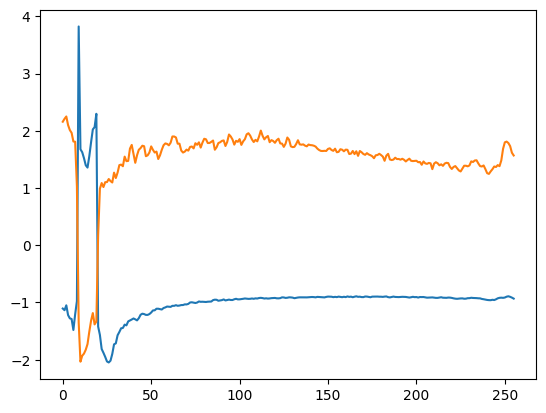

In [3]:
plt.plot(E_standardized[0])
plt.plot(E_standardized[-1])

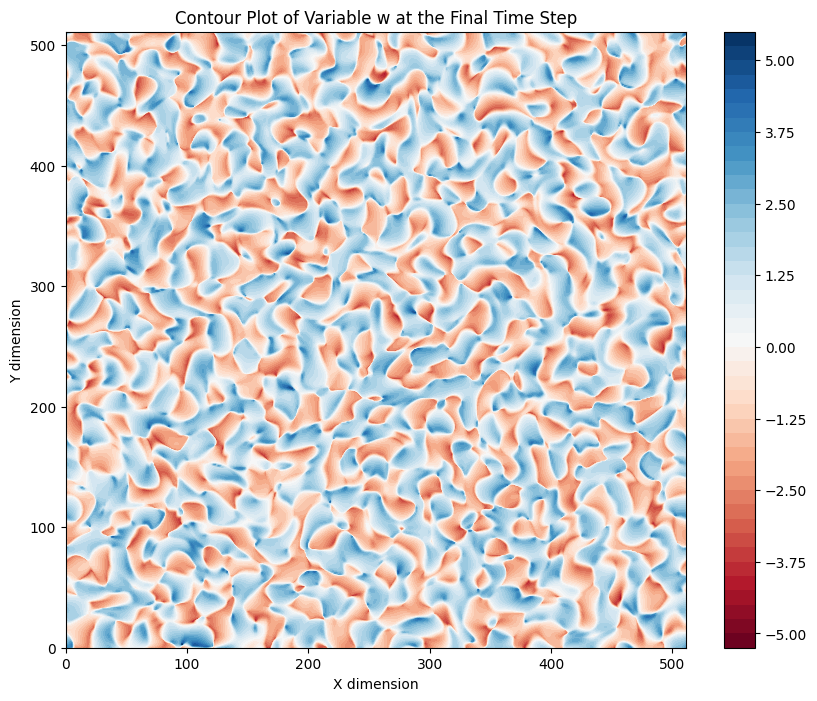

In [4]:
final_slice = w_standardized[0]

plt.figure(figsize=(10, 8))
plt.contourf(final_slice, levels=50, cmap='RdBu')
plt.colorbar()
plt.title('Contour Plot of Variable w at the Final Time Step')
plt.xlabel('X dimension')
plt.ylabel('Y dimension')
plt.show()

In [5]:
def build_encoder_decoder(input_shape_E, output_shape_w):
    # Encoder
    encoder_input = layers.Input(shape=input_shape_E)
    x = layers.Dense(128, activation='relu')(encoder_input)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
   
    
    encoder_output = layers.Dense(128 * 128 * 1, activation='relu')(x)

    # Decoder
    decoder_input = layers.Reshape((128, 128, 1))(encoder_output)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(decoder_input)  
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu')(x)  
    decoder_output = layers.Conv2DTranspose(output_shape_w[2], (3, 3), padding='same', activation='linear')(x)  

    # Model setup
    model = models.Model(inputs=encoder_input, outputs=decoder_output)
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


input_shape_E = (256,)  
output_shape_w = (512, 512, 1) 

model = build_encoder_decoder(input_shape_E, output_shape_w)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 16384)             8404992   
                                                                 
 reshape (Reshape)           (None, 128, 128, 1)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 256, 256, 64)      640   

2024-04-30 14:01:25.593940: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 14:01:25.607158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 14:01:25.607201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 14:01:25.610027: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 14:01:25.610067: I external/local_xla/xla/stream_executor

In [6]:

E_train, E_val, w_train, w_val = train_test_split(E_standardized, w_standardized, test_size=0.2, random_state=42)

In [7]:
E_train = tf.convert_to_tensor(E_train, dtype=tf.float32)
w_train = tf.convert_to_tensor(w_train, dtype=tf.float32)
E_val = tf.convert_to_tensor(E_val, dtype=tf.float32)
w_val = tf.convert_to_tensor(w_val, dtype=tf.float32)

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    min_delta=0.001,     
    patience=10,          
    restore_best_weights=True 
)

history = model.fit(
    E_train, w_train,
    epochs=100,  
    batch_size=32,
    validation_data=(E_val, w_val),
    callbacks=[early_stopping]
)

Epoch 1/100


2024-04-30 14:01:36.175979: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-30 14:01:36.216602: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-30 14:01:36.327920: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-30 14:01:40.420042: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f864d83c270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-30 14:01:40.420075: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-04-30 14:01:40.423113: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714500100.473014  154048 device_compiler.

20/20 [==============================] - 12s 230ms/step - loss: 0.8751 - val_loss: 0.7631
Epoch 2/100
20/20 [==============================] - 2s 89ms/step - loss: 0.6545 - val_loss: 0.6135
Epoch 3/100
20/20 [==============================] - 2s 89ms/step - loss: 0.4812 - val_loss: 0.4277
Epoch 4/100
20/20 [==============================] - 2s 89ms/step - loss: 0.3798 - val_loss: 0.3825
Epoch 5/100
20/20 [==============================] - 2s 89ms/step - loss: 0.3394 - val_loss: 0.3455
Epoch 6/100
20/20 [==============================] - 2s 89ms/step - loss: 0.3158 - val_loss: 0.3363
Epoch 7/100
20/20 [==============================] - 2s 89ms/step - loss: 0.3043 - val_loss: 0.3262
Epoch 8/100
20/20 [==============================] - 2s 88ms/step - loss: 0.2966 - val_loss: 0.3142
Epoch 9/100
20/20 [==============================] - 2s 89ms/step - loss: 0.2893 - val_loss: 0.3075
Epoch 10/100
20/20 [==============================] - 2s 89ms/step - loss: 0.2852 - val_loss: 0.3024
Epoch 11/

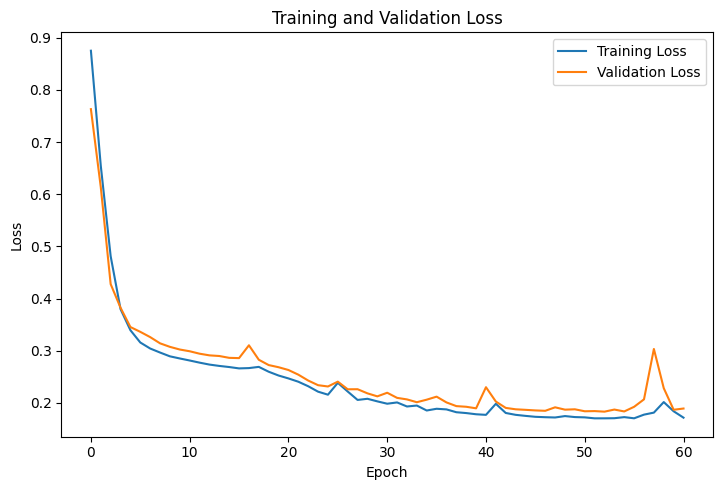

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()


# plt.subplot(1, 2, 2)
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

plt.tight_layout()
plt.show()

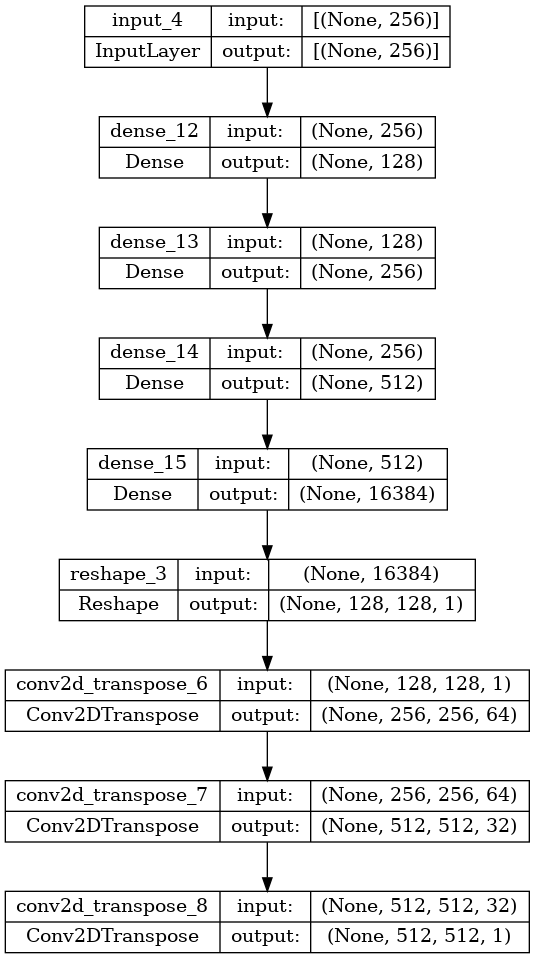

In [121]:
plot_model(model, show_shapes=True)

1/1 [==============================] - 0s 17ms/step


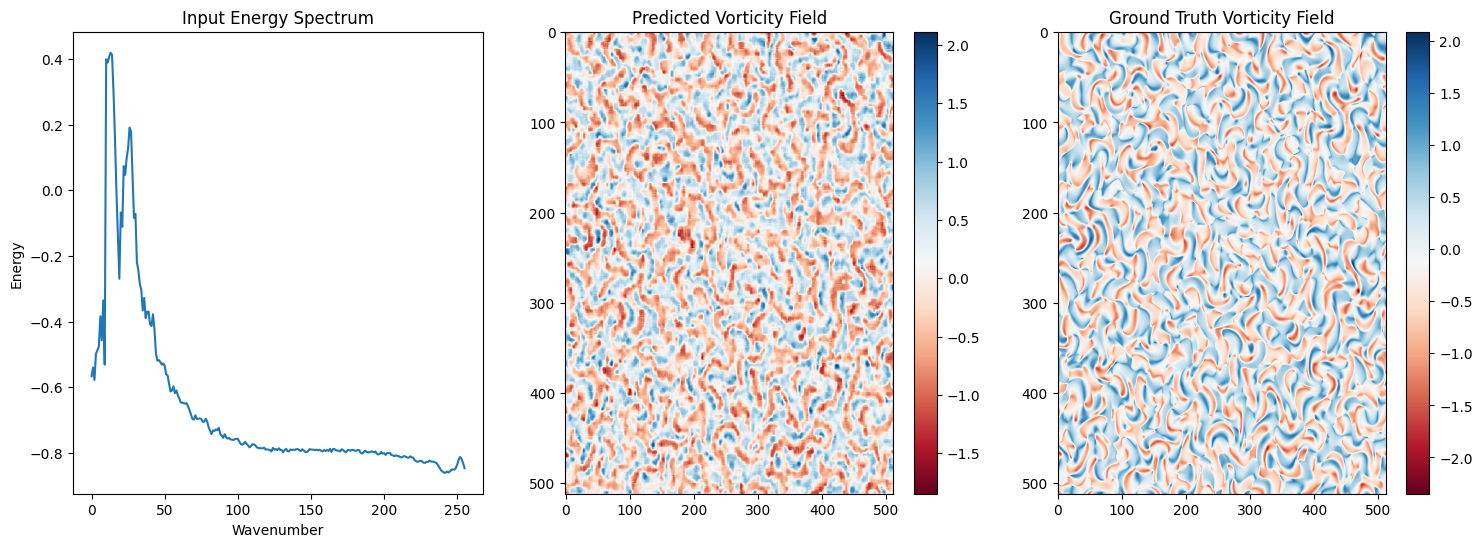

In [14]:
def predict_and_compare_random_timestep(E_val, w_val, model):
    """
    Selects a random timestep from E_val, makes a prediction using the model, and plots the input, 
    predicted output, and ground truth output.
    
    Parameters:
    - E_val: numpy.ndarray, the validation set for E (energy spectrum).
    - w_val: numpy.ndarray, the validation set for w (vorticity field).
    - model: a trained TensorFlow/Keras model.
    """
    random_index = np.random.randint(0, E_val.shape[0])

    E_sample = E_val[random_index:random_index+1]  
    w_true_sample = w_val[random_index]

    w_predicted = model.predict(E_sample)

    # Plotting
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Input Energy Spectrum")
    plt.plot(E_sample[0])
    plt.xlabel("Wavenumber")
    plt.ylabel("Energy")

    plt.subplot(1, 3, 2)
    plt.title("Predicted Vorticity Field")
    plt.imshow(w_predicted[0, :, :, 0], cmap='RdBu', aspect='auto')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.title("Ground Truth Vorticity Field")
    plt.imshow(w_true_sample, cmap='RdBu', aspect='auto')
    plt.colorbar()

    plt.show()

    return w_predicted

w_predicted = predict_and_compare_random_timestep(E_val, w_val, model)

In [27]:
## COMBINED DATASETS

def load_and_standardize_multiple_data(filepaths):
    """
    Load, standardize, and combine data from multiple NetCDF files.
    
    Parameters:
    - filepaths: list of str, paths to the .nc files.
    
    Returns:
    - E_combined: numpy.ndarray, combined standardized energy spectra.
    - w_combined: numpy.ndarray, combined standardized vorticity fields.
    """
    all_E = []
    all_w = []
    
    for filepath in filepaths:
        ds = xr.open_dataset(filepath)
        E = ds['E'].values
        w = ds['w'].values
        
        original_shape = w.shape
        w_flattened = w.reshape(w.shape[0], -1)
        
        scaler_E = StandardScaler()
        scaler_w = StandardScaler()
        
        E_standardized = scaler_E.fit_transform(E)
        w_standardized = scaler_w.fit_transform(w_flattened)
        w_standardized = w_standardized.reshape(original_shape)
        
        all_E.append(E_standardized)
        all_w.append(w_standardized)
        
        # joblib.dump(scaler_E, f'scaler_E_{filepath.split("/")[-1]}.pkl')
        # joblib.dump(scaler_w, f'scaler_w_{filepath.split("/")[-1]}.pkl')
    
    # Combine all datasets
    E_combined = np.vstack(all_E)
    w_combined = np.vstack(all_w)
    
    return E_combined, w_combined

# Filepaths for the datasets
filepaths = [
    '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_1.nc',
    '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_3.nc',
    '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_5.nc',
    '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_7.nc',
    '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid.nc'
]

E_combined, w_combined = load_and_standardize_multiple_data(filepaths)

In [28]:
E_train, E_val, w_train, w_val = train_test_split(E_combined, w_combined, test_size=0.2, random_state=42)

E_train = tf.convert_to_tensor(E_train, dtype=tf.float32)
w_train = tf.convert_to_tensor(w_train, dtype=tf.float32)
E_val = tf.convert_to_tensor(E_val, dtype=tf.float32)
w_val = tf.convert_to_tensor(w_val, dtype=tf.float32)

In [128]:
model = build_encoder_decoder(input_shape_E, output_shape_w)

In [129]:
history = model.fit(
    E_train, w_train,
    epochs=100,  
    batch_size=32,
    validation_data=(E_val, w_val),
    callbacks=[early_stopping]
)

Epoch 1/100
96/96 [==============================] - 16s 155ms/step - loss: 0.9201 - val_loss: 0.8341
Epoch 2/100
96/96 [==============================] - 9s 92ms/step - loss: 0.7266 - val_loss: 0.5754
Epoch 3/100
96/96 [==============================] - 9s 92ms/step - loss: 0.4618 - val_loss: 0.3568
Epoch 4/100
96/96 [==============================] - 9s 92ms/step - loss: 0.2960 - val_loss: 0.2508
Epoch 5/100
96/96 [==============================] - 9s 92ms/step - loss: 0.2328 - val_loss: 0.2128
Epoch 6/100
96/96 [==============================] - 9s 92ms/step - loss: 0.2021 - val_loss: 0.1884
Epoch 7/100
96/96 [==============================] - 9s 92ms/step - loss: 0.1742 - val_loss: 0.1714
Epoch 8/100
96/96 [==============================] - 9s 93ms/step - loss: 0.1652 - val_loss: 0.1547
Epoch 9/100
96/96 [==============================] - 9s 93ms/step - loss: 0.1573 - val_loss: 0.1655
Epoch 10/100
96/96 [==============================] - 9s 91ms/step - loss: 0.1935 - val_loss: 0.14

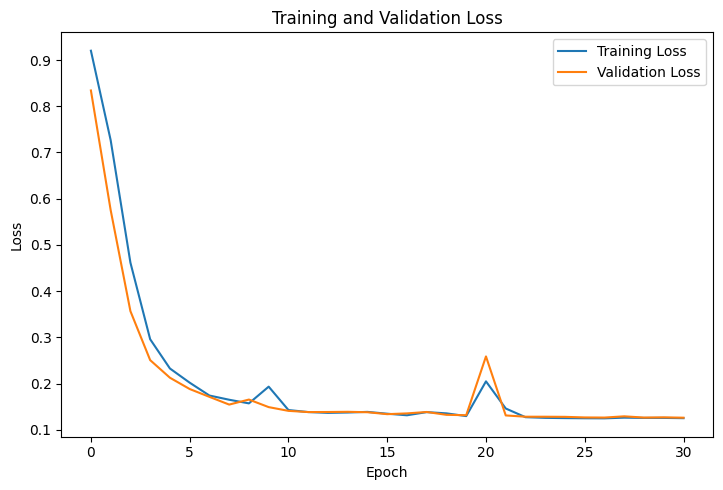

In [130]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()


# plt.subplot(1, 2, 2)
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 16ms/step


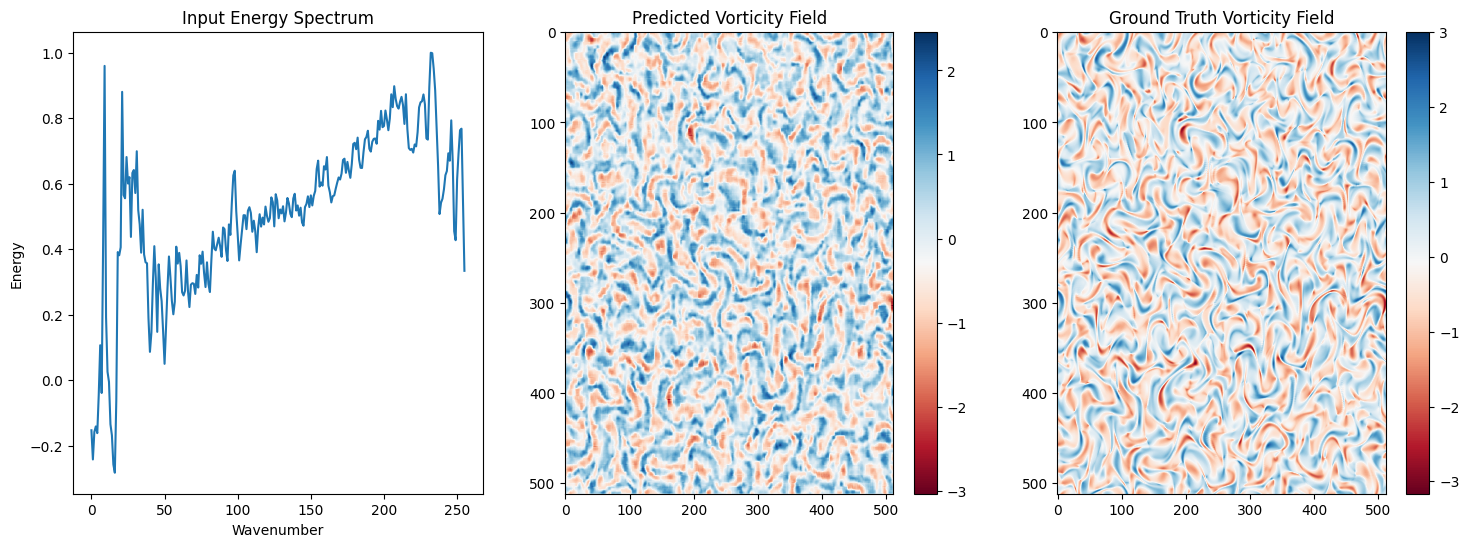

In [132]:
w_predicted = predict_and_compare_random_timestep(E_val, w_val, model)

In [148]:
## Test on the evaluation dataset

filepath = '/mnt/c/Users/mriga/OneDrive/Documents/2D-Turbulence-Python/fluid_0_9.nc'
E_standardized_test, w_standardized_test = load_and_standardize_data(filepath)

In [149]:
E_test = tf.convert_to_tensor(E_standardized_test, dtype=tf.float32)
w_test = tf.convert_to_tensor(w_standardized_test, dtype=tf.float32)

1/1 [==============================] - 0s 15ms/step


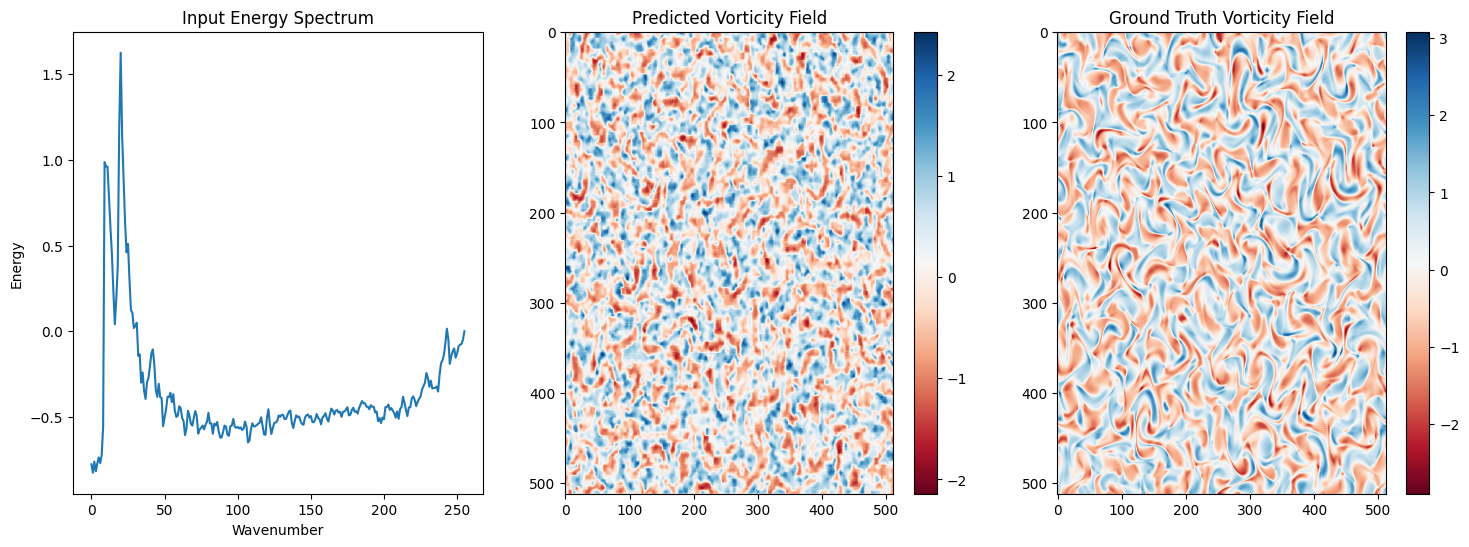

In [162]:
w_predicted = predict_and_compare_random_timestep(E_test, w_test, model)

In [163]:
## Deeper encoder-decoder model

def build_deeper_encoder_decoder(input_shape_E, output_shape_w):
    # Encoder
    encoder_input = layers.Input(shape=input_shape_E)
    x = layers.Dense(128, activation='relu')(encoder_input)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(1024, activation='relu')(x)  # Additional dense layer

    encoder_output = layers.Dense(128 * 128 * 1, activation='relu')(x)

    # Decoder
    decoder_input = layers.Reshape((128, 128, 1))(encoder_output)
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu')(decoder_input)  # Increased filters
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(x)  # Increased filters
    x = layers.Conv2DTranspose(32, (3, 3), padding='same', activation='relu')(x)  # Additional Conv2DTranspose layer
    decoder_output = layers.Conv2DTranspose(output_shape_w[2], (3, 3), padding='same', activation='linear')(x)

    # Model setup
    model = models.Model(inputs=encoder_input, outputs=decoder_output)
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

deeper_model = build_deeper_encoder_decoder(input_shape_E, output_shape_w)
deeper_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 256)               33024     
                                                                 
 dense_25 (Dense)            (None, 512)               131584    
                                                                 
 dense_26 (Dense)            (None, 1024)              525312    
                                                                 
 dense_27 (Dense)            (None, 16384)             16793600  
                                                                 
 reshape_8 (Reshape)         (None, 128, 128, 1)       0   

In [164]:
history = deeper_model.fit(
    E_train, w_train,
    epochs=100,  
    batch_size=32,
    validation_data=(E_val, w_val),
    callbacks=[early_stopping]
)

Epoch 1/100


2024-04-30 13:13:22.539894: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-30 13:13:22.539973: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-30 13:13:22.539986: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-30 13:13:22.539993: W external/local_tsl/tsl/framework/bfc_

96/96 [==============================] - 41s 363ms/step - loss: 0.8772 - val_loss: 0.7634
Epoch 2/100
96/96 [==============================] - 25s 266ms/step - loss: 0.6286 - val_loss: 0.4407
Epoch 3/100
96/96 [==============================] - 25s 265ms/step - loss: 0.3920 - val_loss: 0.2945
Epoch 4/100
96/96 [==============================] - 25s 265ms/step - loss: 0.2610 - val_loss: 0.2133
Epoch 5/100
96/96 [==============================] - 25s 265ms/step - loss: 0.1972 - val_loss: 0.1840
Epoch 6/100
96/96 [==============================] - 26s 266ms/step - loss: 0.1761 - val_loss: 0.1726
Epoch 7/100
96/96 [==============================] - 26s 266ms/step - loss: 0.1853 - val_loss: 0.1618
Epoch 8/100
96/96 [==============================] - 26s 266ms/step - loss: 0.1542 - val_loss: 0.1532
Epoch 9/100
96/96 [==============================] - 26s 266ms/step - loss: 0.1470 - val_loss: 0.1417
Epoch 10/100
96/96 [==============================] - 25s 265ms/step - loss: 0.1529 - val_loss

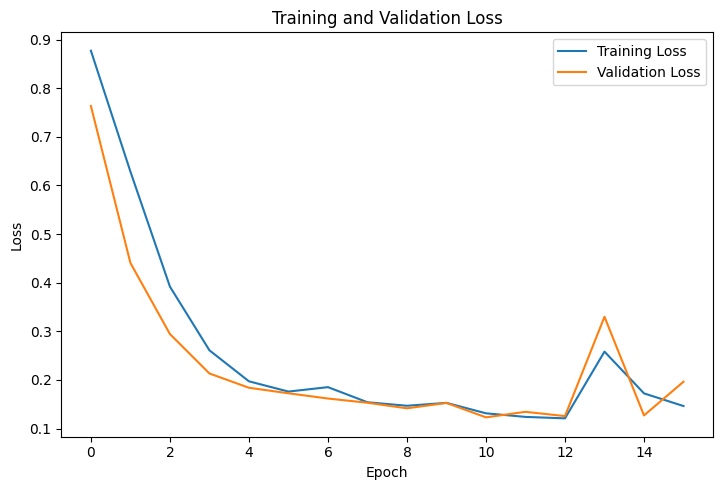

In [165]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()


# plt.subplot(1, 2, 2)
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 14ms/step


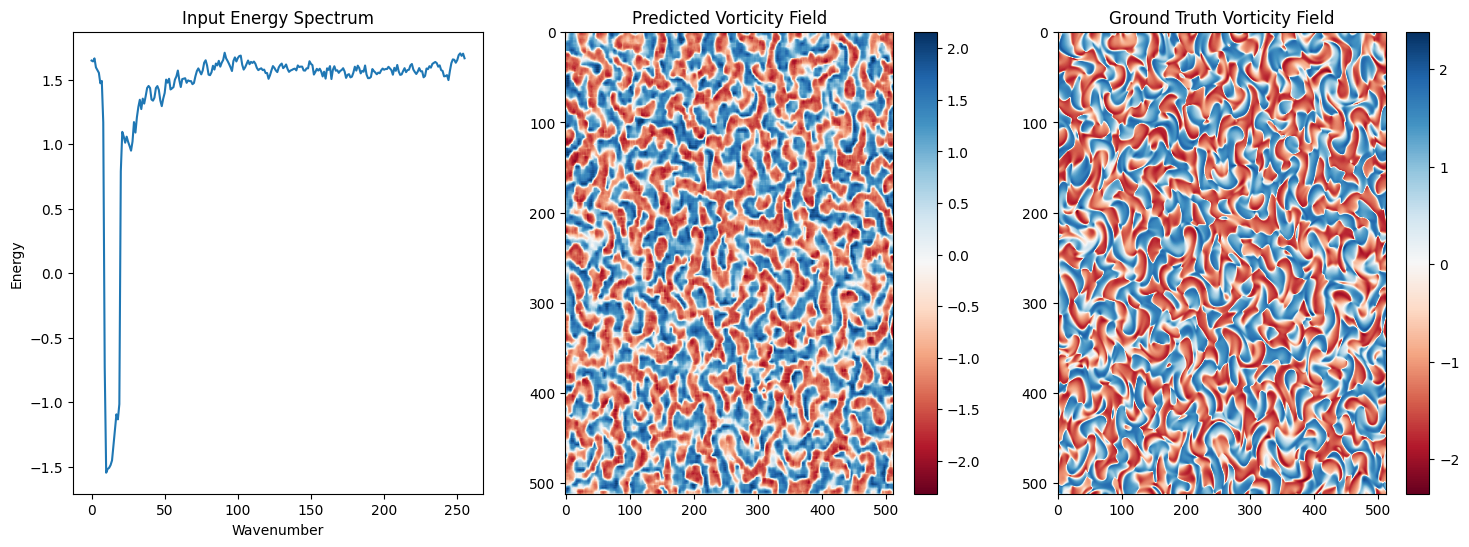

In [197]:
w_predicted = predict_and_compare_random_timestep(E_val, w_val, deeper_model)